# Makine Öğrenmesi

* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)
* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)
* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)
* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)
* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)
* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)
* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)
* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)
* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)

# Basit Doğrusal Regresyon <a id="basit_dogrusal_reg" />

Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.

Anakitle teorik gösterim:  Y = ß0 + ß1X + ε

Örneklem gerçek değerler:  yi = b0 + b1xi + ei

Tahmin Modeli:  ýi = b0 + b1xi
		
			ß0 = Doğrunun eksenini kestiği nokta
			ß1 = Doğrunun eğimi
			ε  = Hata terimi
            
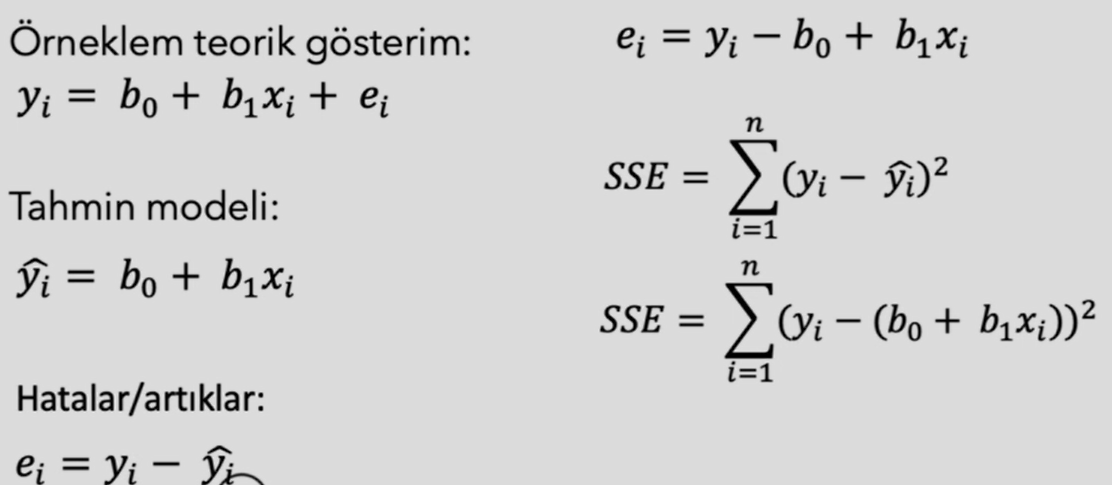

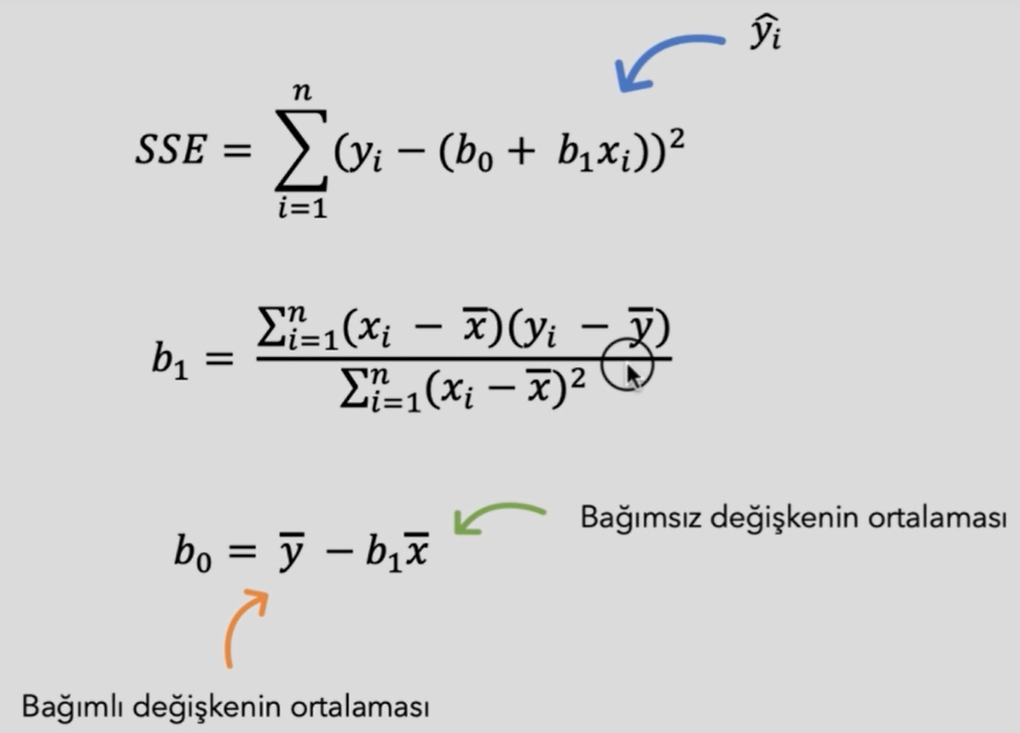

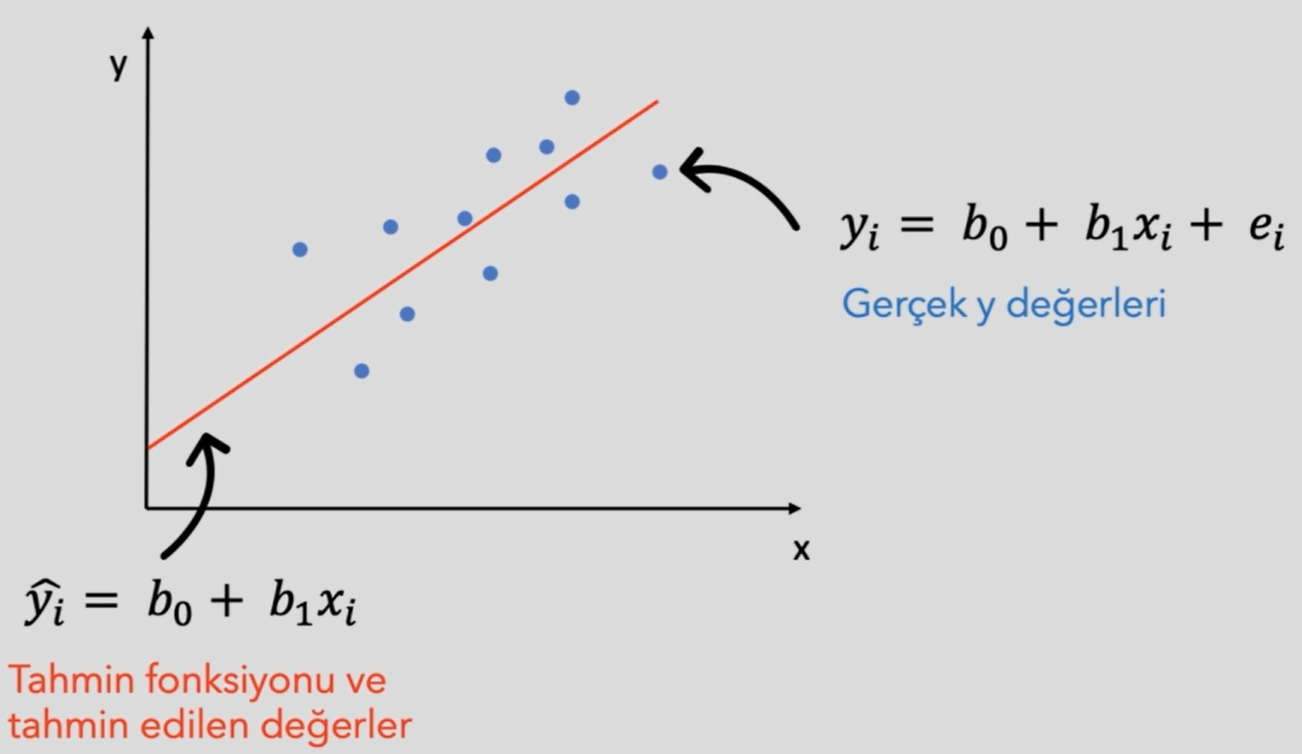

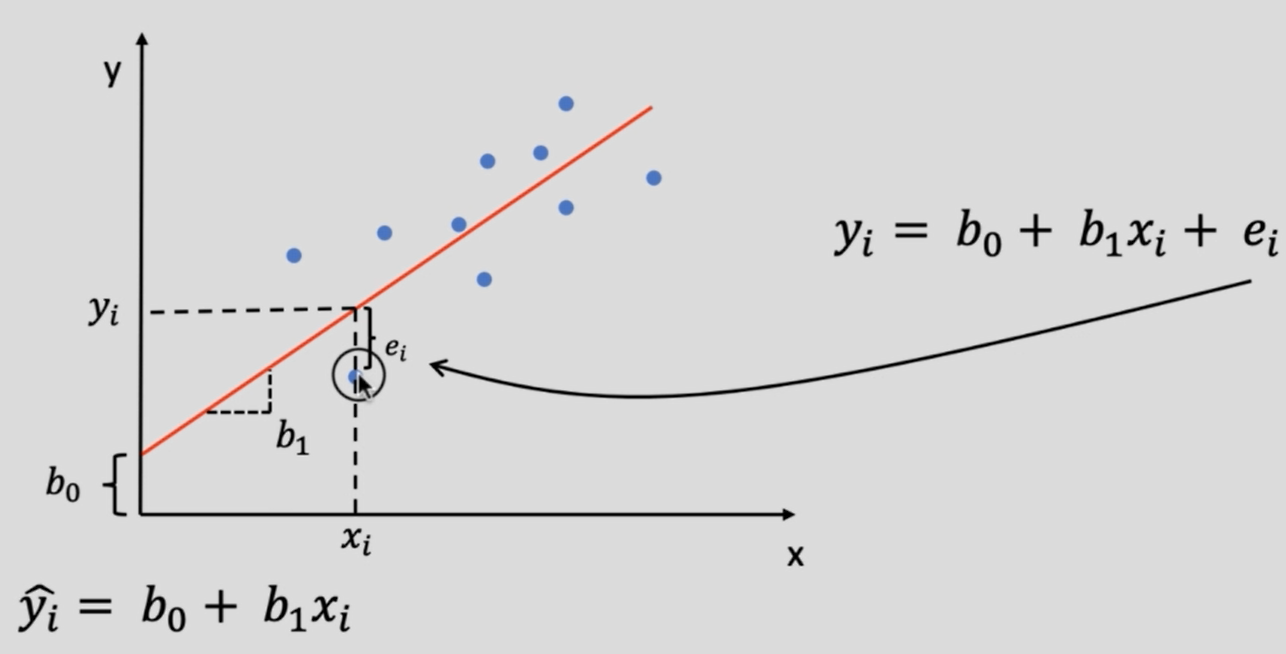

In [1]:
import pandas as pd 
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df = df.iloc[:, 1:len(df)]

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
df.isnull().values.any()

False

In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [8]:
import seaborn as sns
sns.pairplot(df, kind='reg')

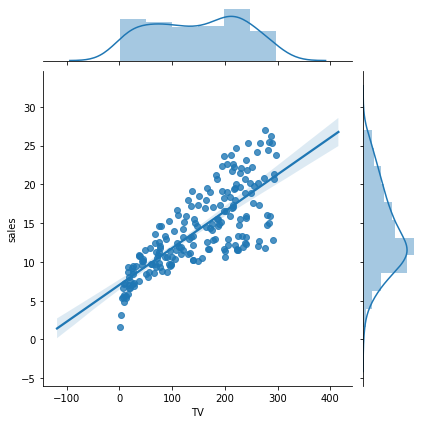

In [9]:
sns.jointplot(x = 'TV', y = 'sales', data = df, kind = 'reg');

### Statsmodels ile modelleme

In [10]:
import statsmodels.api as sm

In [11]:
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [12]:
X = sm.add_constant(X)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [13]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [14]:
y = df['sales']

In [15]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [16]:
lm = sm.OLS(y, X)

In [17]:
model = lm.fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        16:25:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

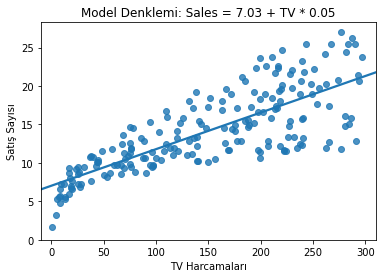

In [19]:
import matplotlib.pyplot as plt
g = sns.regplot(df['TV'], df['sales'], ci=None)
g.set_title("Model Denklemi: Sales = 7.03 + TV * 0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel('TV Harcamaları')
plt.xlim(-10, 310)
plt.ylim(bottom=0);

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
X = df[['TV']]
y = df['sales']
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_ # katsayi
model.coef_ # b

array([0.04753664])

In [22]:
model.score(X, y) # r2 değeri

0.611875050850071

In [23]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

### Tahmin

Model denklemi : 
    
    Sales = 7.03 + TV*0.04
    
    Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur? 

In [24]:
7.03 + 30*0.04

8.23

In [25]:
X = df[['TV']]
y = df['sales']
reg = LinearRegression()
model = reg.fit(X, y)

In [26]:
model.predict([[30]])

array([8.45869276])

In [27]:
yeni_veri = [[5], [90], [200]]

In [28]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

## Çoklu Doğrusal Regresyon

Temel amaç, bağımlı ve bağımsız değişkenler arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.  

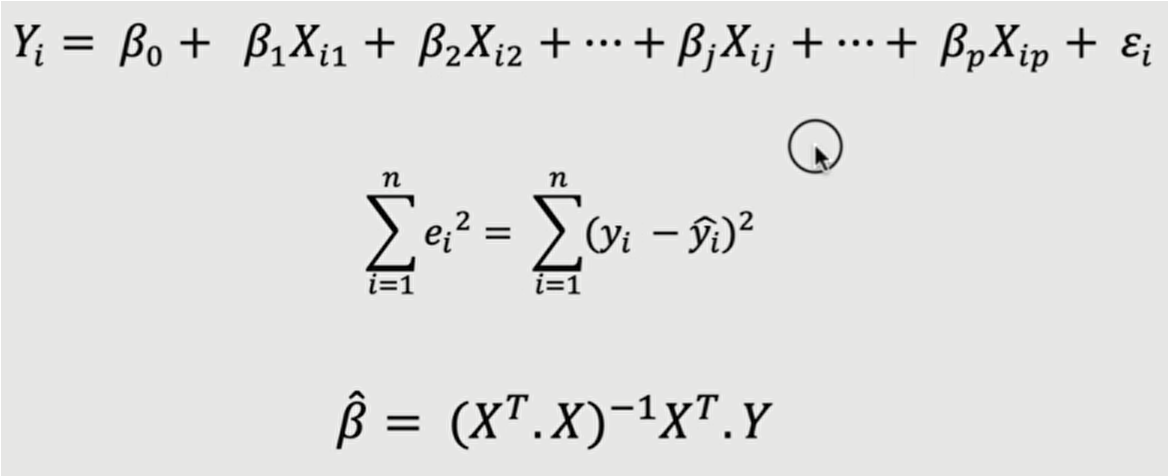

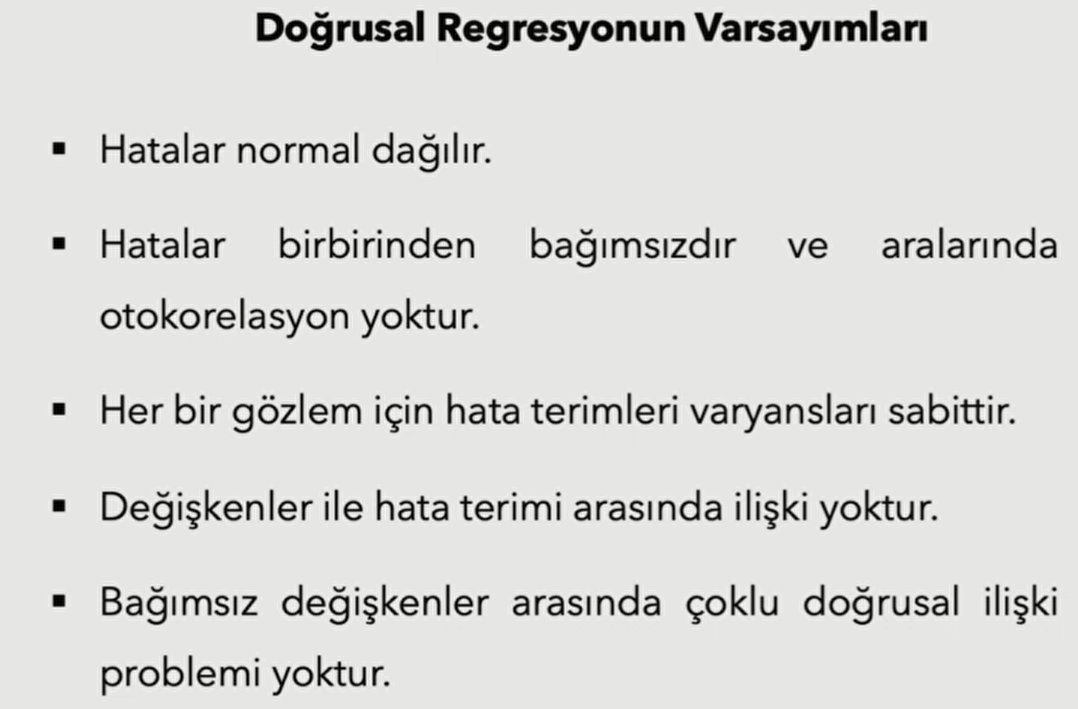

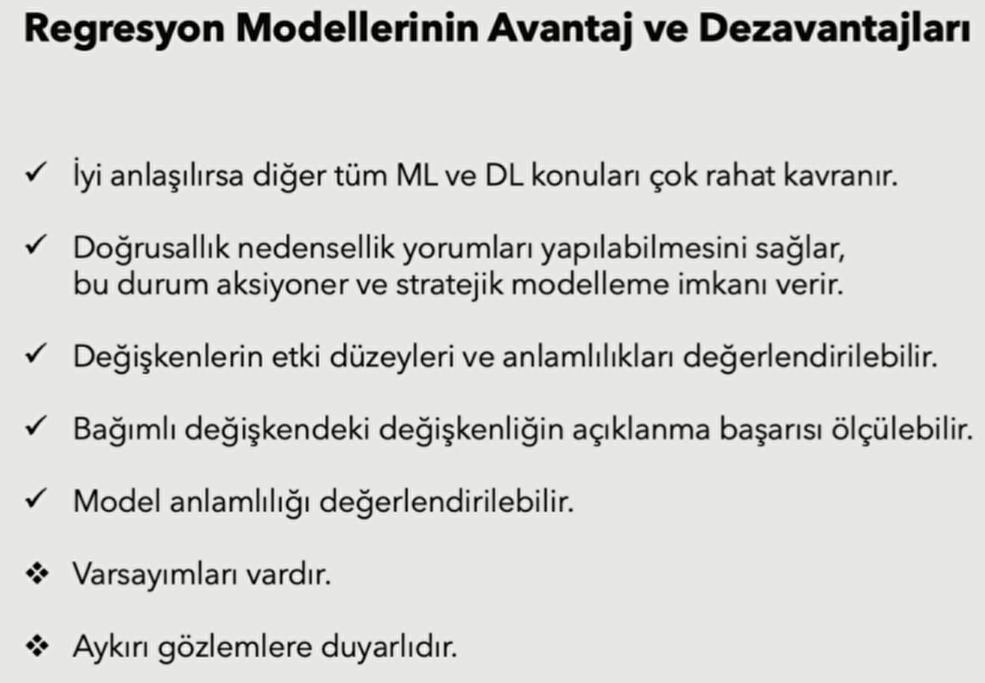

In [34]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols=[1, 2, 3, 4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [40]:
X = df.drop("sales", axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [41]:
X_train.shape

(160, 3)

In [42]:
y_train.shape

(160,)

In [43]:
X_test.shape

(40, 3)

In [44]:
training = df.copy()

In [45]:
training.shape

(200, 4)

### Statsmodels

In [46]:
lm = sm.OLS(y_train, X_train)

In [47]:
model = lm.fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):                   1.28e-137
Time:                        16:38:31   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [50]:
model.intercept_

2.979067338122629

In [51]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

### Tahmin

Model Denklemi ; 

Sales = 2.97 + TV*0.04 + radio*0.18 + newspaper*0.002

Örneğin 30 birim TV harcaması, 10 birim radio harcaması, 40 birim de gazete harcaması olduğunda tahmini değer ne olur? 

In [62]:
yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [63]:
model.predict(yeni_veri)

array([6.32334798])

# PCR - Temel Bileşen Regresyonu